In [1]:
import pennylane as qml
from pennylane import numpy as np
from Ising_circuit_4qubits import Ising

import matplotlib.pyplot as plt

$H = \sum_i^N X_i X_{i + 1} + h Z_i$ where $h$ is an external transverse field. 

## Magnetization

As a sanity check for the Ising circuit, make sure the magnetization in the $z$ direction as a function of the transverse field $h$ makes sense. We expect 
* h < 1 Ferromagnetic phase, spins should be aligned in the $X$ direction.
* h = 1 Critical point, phase transition, expect discontinuity
* h > 1 Paramagnetic phase, spins aligned in the transverse field direction $Z$.


In [2]:
n_qubits = 4
dev = qml.device("default.qubit", wires = n_qubits)
@qml.qnode(dev)
def obs(h, observables): #Create Ising groundstates following method from Cervera-Lierta arXiv:1807.07112
    Ising(h)
    return [qml.expval(o) for o in observables]

#Lets compute some local observables
obs_list = [qml.PauliZ(i) for i in range(n_qubits)]


h_values = np.linspace(0, 4, 100)

mag_arr = []
for h in h_values:
    mag = np.sum(obs(h, obs_list))
    mag_arr.append(mag)

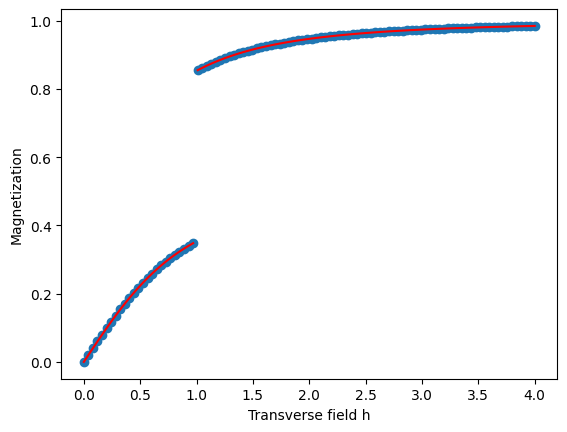

In [4]:
#Exact solution
def low_h(h):
    return h/(2*np.sqrt(1 + h**2))

def high_h(h):
    return 0.5 +h/(2*np.sqrt(1 + h**2))

plt.scatter(h_values, np.array(mag_arr)/4)
plt.plot(h_values[0:25],  low_h(h_values[0:25]), color = 'red')
plt.plot(h_values[25:], high_h(h_values[25:]), color = 'red')
#plt.scatter(h_values[:25], np.array(mag_arr)[:25]/4)
plt.ylabel("Magnetization")
plt.xlabel("Transverse field h")
plt.show()